## This will be the Main File for our testing adn things. We can read/write etc in this file

## Step 1: Import the Appropriate Libaries and read in the data file



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [13]:
df = pd.read_excel('Competition1_raw_data.xlsx', na_values='-')
print (df.head())

     I1                                  I2    I3  P(IPO)  P(H)  P(L)  \
0  AATI  ADVANCED ANALOGIC TECHNOLOGIES INC  3674    10.0   9.5   8.5   
1  ABPI     ACCENTIA BIOPHARMACEUTICALS INC  2834     8.0  10.0   8.0   
2  ACAD          ACADIA PHARMACEUTICALS INC  2834     7.0  14.0  12.0   
3  ACHN       ACHILLION PHARMACEUTICALS INC  2834    11.5  16.0  14.0   
4  ACLI     AMERICAN COMMERCIAL LINES INC.   4492    21.0  21.0  19.0   

     P(1Day)     C1   C2    C3  ...            C6       C7     T1       T2  \
0  11.870000  122.0  1.0  3.43  ...    10600000.0   51.345  470.0  12719.0   
1   7.250000  259.0  0.0 -1.62  ...     2400000.0   25.936  791.0  21792.0   
2   6.700000   90.0  1.0 -1.24  ...     5000000.0    7.378  201.0   5262.0   
3  12.390000  209.0  1.0 -0.91  ...     4500000.0    8.526  328.0   8259.0   
4  56.599998   80.0  1.0  0.07  ...     8250000.0  632.298  572.0  14830.0   

        T3     T4      T5    S1     S2     S3  
0  11560.0  301.0   690.0  62.0  117.0  139.

## Step 2: Now Lets analyze the data that we have to work with

In [14]:
print('Checking the shape of our data \n')
print(df.shape)

print('Checking the data types we have \n')
print(df.dtypes)

print('Checking for missing values \n')
print(df.isna().sum())

Checking the shape of our data 

(682, 22)
Checking the data types we have 

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object
Checking for missing values 

I1          0
I2          0
I3          8
P(IPO)      5
P(H)       10
P(L)       10
P(1Day)    22
C1         22
C2         22
C3         36
C4         22
C5          6
C6          6
C7         72
T1          1
T2          1
T3          1
T4          1
T5          1
S1          1
S2          1
S3          1
dtype: int64


## Step 3: Formatting our data 

In order to make sure our data matches with our data dictionary, we need to convert certain columns to certain values. 

In [15]:
#need to convert these rows to the values as indicated by the Data Dictionary 

to_float = ['P(IPO)','P(H)', 'P(L)', 'P(1Day)', 'C1', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3']

for col in to_float:
    df[col]=pd.to_numeric(df[col], errors='coerce')
df['C2'] = df['C2'].astype('bool') 
print(df.dtypes)

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2            bool
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object


In [18]:
df = df.dropna(subset=['P(1Day)'])
print(df.isna().sum())

I1          0
I2          0
I3          0
P(IPO)      0
P(H)        0
P(L)        0
P(1Day)     0
C1          0
C2          0
C3         24
C4          0
C5          0
C6          0
C7         60
T1          0
T2          0
T3          0
T4          0
T5          0
S1          0
S2          0
S3          0
dtype: int64


/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/tljh/user/lib/python3.6/site-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histogram of EPS ')

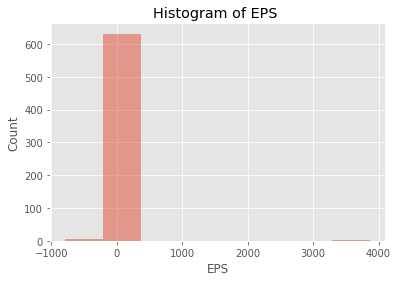

In [19]:
plt.hist(df["C3"], bins=8, alpha=0.5)
plt.xlabel('EPS')
plt.ylabel('Count')
plt.title('Histogram of EPS ')

We have massive outliers so we can't use the mean for our imputation so we went with median instead. 

Text(0.5, 1.0, 'Histogram of Sales ')

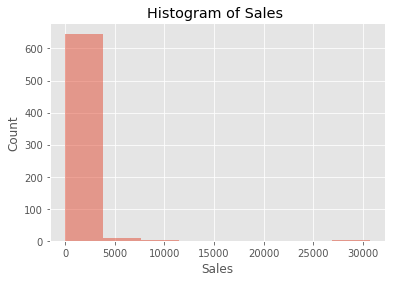

In [33]:
plt.hist(df["C7"], bins=8, alpha=0.5)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Sales ')

In [22]:
df['C7_Impute'] = np.where(df['C7'].isna(),1,0)
df['C3_Impute'] = np.where(df['C3'].isna(),1,0)

In [25]:
c7_median = df['C7'].median()
print(c7_median)
df['C7'] = df['C7'].fillna(c7_median)

c3_median = df['C3'].median()
print(c3_median)
df['C3'] = df['C3'].fillna(c3_median)

107.462
0.0


In [26]:
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3,C7_Impute,C3_Impute
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.610394,13.635394,25.934766,149.728788,0.066724,0.007282,4.996285e+07,1.258248e+07,470.631368,468.701515,12849.703030,11463.393939,295.957576,669.890909,68.675758,120.896970,145.516667,0.090909,0.036364
std,5.954214,6.613816,5.790112,73.234948,152.817467,158.390378,0.033318,1.055377e+08,2.539940e+07,1587.801852,176.374430,5461.888999,4867.297323,122.172959,298.268982,39.410385,85.542267,69.824545,0.287698,0.187335
min,5.000000,0.000000,5.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,40.000000,0.000000,0.000000
25%,10.000000,13.000000,11.000000,11.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,356.000000,9213.750000,8200.250000,214.000000,463.750000,45.000000,74.000000,100.000000,0.000000,0.000000
50%,13.750000,15.500000,13.000000,14.845000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,446.000000,12112.500000,10829.500000,280.000000,627.000000,60.000000,101.500000,135.000000,0.000000,0.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,553.250000,15275.000000,13793.500000,355.250000,801.250000,85.000000,144.000000,174.000000,0.000000,0.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,2729.000000,309.000000,944.000000,883.000000,1.000000,1.000000


In [34]:
## Creating Necessary Variables Y1, Y2, C3', C5', and C6'
## Code found on https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
df['P(Mid)'] = (df['P(H)'] + df['P(L)']) / 2
df['Y1'] = np.where(df['P(IPO)'] < df['P(Mid)'], 1,0)
df['Y2'] = np.where(df['P(IPO)'] < df['P(1Day)'], 1,0)
df["C3'"] = np.where(df['C3'] > 0, 1, 0)
df["C5'"] = df['C5'] / df['C6']
df["C6'"] = np.where(df['P(IPO)'] > df['P(Mid)'], ((df['P(IPO)'] - df['P(Mid)']) / df['P(Mid)']) * 100,0)

In [35]:
df.to_csv('outtest.csv')